# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **  
RM - Although the number of rooms in a house is a discrete value, the average for a neighborhood (RM) takes on a continuos value which intuition suggests is closely related to the size and value of a house. Most people would tell you that small shacks are cheap and Large Mansions are for the wealthy. I believe that RM will have a strong correlation to house pricing, as RM increases so will MEDV. 

LSTAT - LSTAT is most likely negatively correlated with housing values. The lower class generally cannot afford 'expensive' houses and thus are likely to live in 'cheaper' houses because 'lower class' generally implies low income (net income) and 'expensive' or high valued houses generally come with high monthly rents or mortgadge payments. The working poor generally cannot afford expensive houses. 

PTRATIO - A low PTRATIO means fewer teachers and mores students in a given classroom. This variable may have some correlation to the LSTAT variable. Most parents prefer to keep their children in a school which has a low PTRATIO. However, I think it is more likely that a wealthy family could relocate to an area where this ratio is low. If my two assumptions are correct, the wealthy attracted to by the low PTRATIO are more mobile and may relocate to these areas, resulting in a weak negative correlation between PRATIO and MEDV.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** The R^2 value for our model is signifcantly higher than .5 with a score of.923. This means that 92.3 percent of the variance in the data is predicted by the model. Assuming that our data is not severely skewed, this is a pretty good indicator that the our model has picked up a strong trend in our data. However its should noted that depending on the particular problem 92.3% may or may not be an acceptable score. 


### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = .2, random_state =5)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** It is necessary to split your data into training and testing sets to avoid overfitting or producing a model with a high variance error. A random sample of data used for testing will likely contain the same pattern as the training data. If the model is properly trained to find this trend it should work well for both data sets. However if the model is too complex and has too many parameters it may have been over fit, or picked up on randomness in the training data and score low on the testing data. This indicates that the model needs to be simplified or more data is required to train such a complex model. Otherwise it likely will not perform well on new data. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

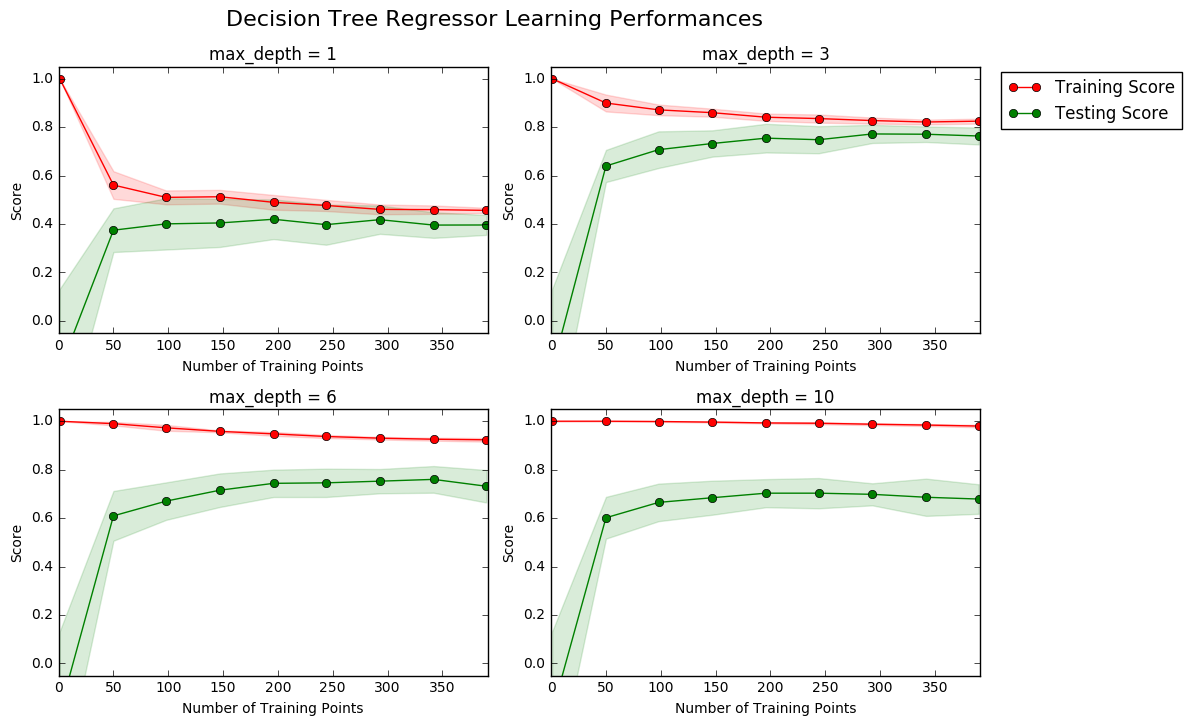

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** Model with Max depth = 3. It is clear by the increasing score between 0 to about 200 points that more data is effective in improving the model. However after about 200 data points the score for the validation and training set appear to level off and converge. After this point each set has a nearly constant score of about %80 indicating the bias error has been reduced. Because the performance is relatively constant after 200 training points more data will not help. Additionally, because both curves have converged, there does not appear to be a high variance error. After about 300 data points the variance error also appears to be a minnimum. For this reason, I do not believe that going beyond the 400 data points used will improve the current model. 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

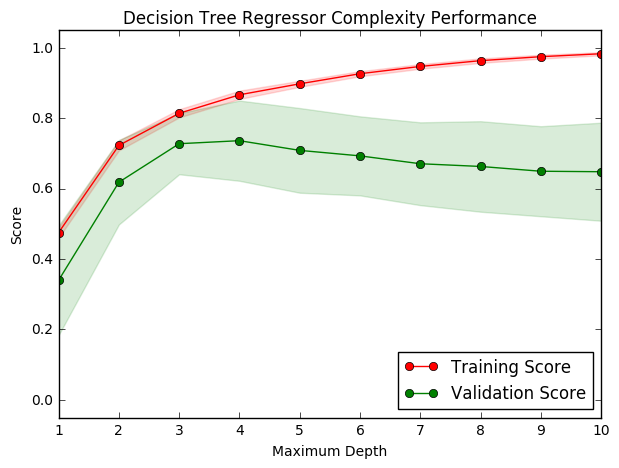

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: ** When trained with a depth of 1, the model has a high bias. It is scoring much lower at around 40% because it is too simple top capture the trends in the data.  At Maximum depth = 10, the training and validation curves have deviated. This is a result of over fitting the model, which produces a high variance error. In other words the random patterns seen in the training data are not present in the testing data. The model has a high bias when the graph score is low and a high variance when there is a significant gap (more than 1 deviation) between the training and validation score. 

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** Maximum Depth = 3. 
At a Maximum depth of 3, the validation set has reached nearly its highest value. Why would I not choose 4? At a depth of 4 the score looks to be about the same as 3, however the model variance error has started to increase. You can see that the shaded region has become larger, showing a larger deviation in predctions. Here the validation curve is starting to fall outside of the uncertainty band. Not only does this high variance error give unrealistic expectations of the model, but you can actually see that at 4 the uncertainty band reaches lower than at 3. This means that there is a reasonable chance that it might consistently produce lower scores than 3. I believe that 3 is best because, the score is maximum, the variance is nearly minnimum and the validation results are relistically represented in training. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** The grid search is a tool for tuning your model without the need to adjust parameters manually. The grid search allows you optimize your model by searching the parameters space for a model in an organized way and recording the value of the parameters for which the performance was best. Multiple parameters can also be tuned simultaneously at the desired interval when input into a parameter dictionary, read by the grid search during tuning. In this particular model our grid search seeks to optimize the maximum depth of our regression tree (max_depth) by performing an exhaustive grid search in the range of max_depth values from 0 - 10 and minnimizing it's cross validated score. 

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: ** The k-fold cross-validation technique allows you to verify the performance of your model while still using all of you data for training. That is of course excluding the testing data. If you use a grid search without cross validation you still run the risk of producing a model with high variance error that will not perform well on new data. 

The k-fold method works by splitting your data into k seperate data sets of equal size. One of the data sets is held out for validation while the model is trained on the remaining k-1 data sets. This process is then repeated, each time holding out a different data set and training on the remaining k-1. The average across the k trials is then computed to help reduce error that may reslt from how the data points were divided. 

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_iter'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [14]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 5)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [15]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


    **Answer: ** max_depth = 4 
It appears that the model actually determined that the optimal maximum depth was 4. Although this was not what I determined from visual inspection (in question 6) it is still one of the 2 parameters which I considered both (3 and 4). An optimal model at 4 is of course entirely possible, given the fact that most of the uncertainty band overlaps the scores for depths 3 and 4. 

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [16]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $411,931.58
Predicted selling price for Client 2's home: $235,620.00
Predicted selling price for Client 3's home: $922,740.00


**Answer: ** 

    Client1: $411,931.58 ; Client2:  $235,620.00 ;  Client3: $922,740.00 

I believe each of these estimates seems reasonable. In order to check my intution and get a sense of how strongly correlated each predictor is to the pricing value, I have made the 3 plots below and also printed out some stats for the predictors theselves. It looks, as I suspected, from the plots that there is a very strong correlation between Price and RM and a likely a negative correlation between Price and LSTAT. Whethere there is an negative correlation with PTRATIO is not so obvious. 

Therefore my justification for the housing prices is based primarily on the relation of RM and LSTAT to price. 
1) Client 1 is just below the average house price, and on the Price vs RM plot just below the middle of the curve (Please see printed stats below the plots). The neigborhood poverty rate is also a few points above average which will tend to drive down the price a little from the average. Simply put, both of these features are somewhat close to average and so is the Price. 

2) Client 2 is close to the low end in pricing. It a smaller size house (judging by RM) with a high LSTAT. Both of which tend to drive the price down. Hence it is not surprising that the pricing value is signicantly lower than average. 

3) Client 3 is at nearly the maximum size (8 Rooms) and in addition has a very low LSTAT and PTRATIO. It is likely that all of the factors contribute to it being near the top of the Pricing range. 

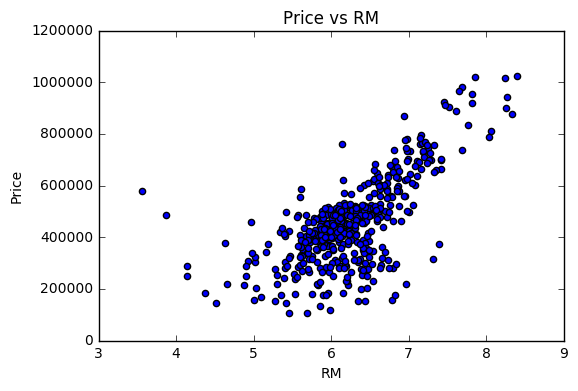

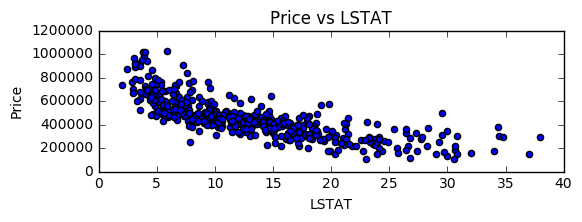

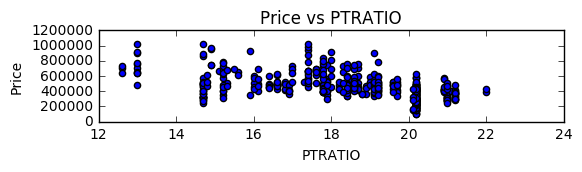

In [27]:
# I wanted to get a visual sense of how important each predictor was in pricing.

import matplotlib.pyplot as plt
def feature_visualizer(feature_name, plot):
    plt.figure(plot)
    plt_RM = plt.subplot(plot, 1, 1)
    plt_RM.scatter(features[feature_name], prices )
    plt_RM.set_title( 'Price vs ' + feature_name)
    plt.xlabel(feature_name)
    plt.ylabel('Price')

p = 1
for f in features:
    feature_visualizer( f , p)
    p += 1 



In [44]:
print('{0:10} \t Max: {1:.2f} \t Mean: {2:.2f} \t Min: {3:.2f} ' 
      .format('Price' ,maximum_price, mean_price , minimum_price) )

for f in features:
    stats = np.max(features[f]), np.mean(features[f]), np.min(features[f])
    print('{0:10} \t Max: {1:.2f} \t\t Mean: {2:.2f} \t\t Min: {3:.2f} '.format(f ,stats[0], stats[1], stats[2]) )



Price      	 Max: 1024800.00 	 Mean: 454342.94 	 Min: 105000.00 
RM         	 Max: 8.40 		 Mean: 6.24 		 Min: 3.56 
LSTAT      	 Max: 37.97 		 Mean: 12.94 		 Min: 1.98 
PTRATIO    	 Max: 22.00 		 Mean: 18.52 		 Min: 12.60 


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [48]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $390,250.00
Trial 8: $383,700.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $36,922.22


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: ** I would not suggest using this model in a real world setting. Though it may be a good for a ball park estimate, our model still has a sizeable variance as can be seen above. The value of the same home may change by almost $37,000  according to how the data has been split up during our training and validation. This may make some clients sore at their realtor if they find out they sold their house this much under value. 

The number of predictors have also been severly reduced, from 14 to 3. It is quite possible a much better model could be produced if all factors were considered. One would think that there are many additional factors such as the size of the lot the house is on, the location of the lot (is it landlocked or near the water) etc. All of the factors, location, population density and poverty level are likely to shift in rurual areas as well. Thus with only a few features I do not believe our model could account for the differences in urban and rural populations.

Finally, although the housing prices have been scaled for inflation I belive there are other subtle factors which may disqualify our model. One concern is that the features have not also been adjusted as well. Boston's socio economic conditions may have changed significantly over the last last 40 years. For example, we may find that today the distribution of the poverty level has shifted substantially. As you can see from the plots below, where a house falls on the LSTAT trend can have a significant bearing on price. Suppose we attempt to predict the price of a house falling close to the mean of the LSTAT distribuion today. Our model may find that it falls toward the far end of the distribution from 1978 which it was trained on. This may have a significantly bias the pricing prediction. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.